In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
pl = pd.read_csv('train (3).csv')

In [3]:
pl.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
pl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


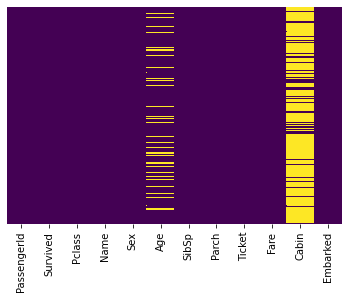

In [5]:
#Missing Null VAlue Using Heat Map
sns.heatmap(pl.isnull(),yticklabels=False,cbar=False,cmap='viridis')

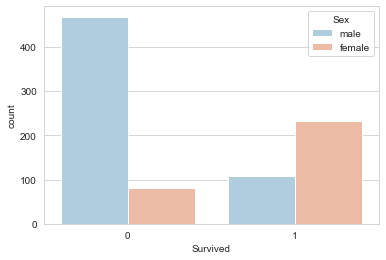

In [6]:
sns.set_style('whitegrid')
sns.countplot(x=pl['Survived'], hue=pl['Sex'],data= pl, palette='RdBu_r')

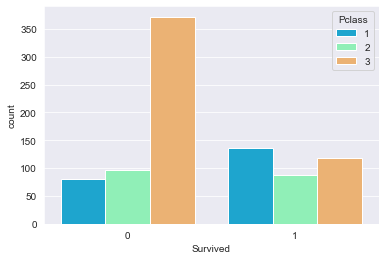

In [7]:
sns.set_style('darkgrid')
sns.countplot(x = pl["Survived"], hue= pl["Pclass"], data= pl, palette='rainbow')

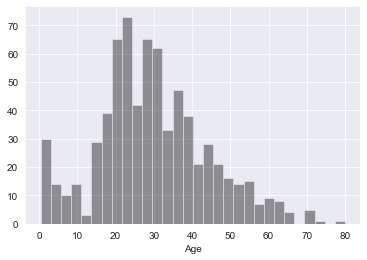

In [8]:
#See Age How AgeWise Present In Ship FirstWay
sns.distplot(pl['Age'].dropna(), kde = False, color = 'Black', bins=30)

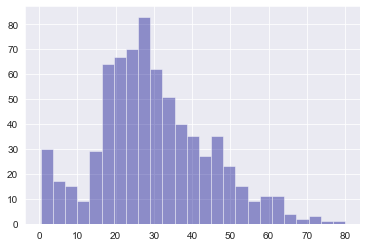

In [9]:
#See Age How AgeWise Present In Ship SecondWay
pl['Age'].hist(bins=25,color='darkblue',alpha=0.4)

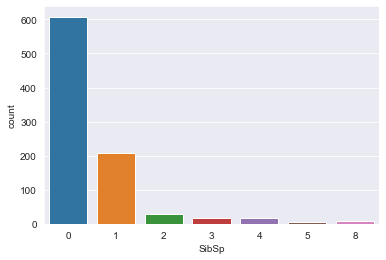

In [10]:
sns.countplot(x=pl['SibSp'], data = pl)

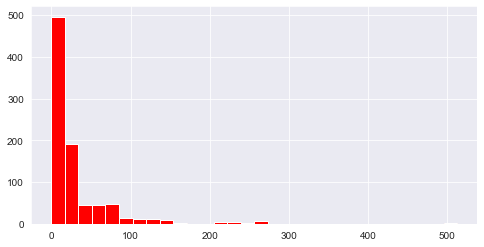

In [11]:
#Avg Fare of brought the Tickets
pl['Fare'].hist(color='red', bins = 30, figsize = (8,4))

# Now It Times to Data Cleaning

Now we see the null Value in HeatMap, we can Basically find null values in Age and Cabin Columns First of All We fill the AGE colums before Doing this I can Analysis which age suitable for missing values

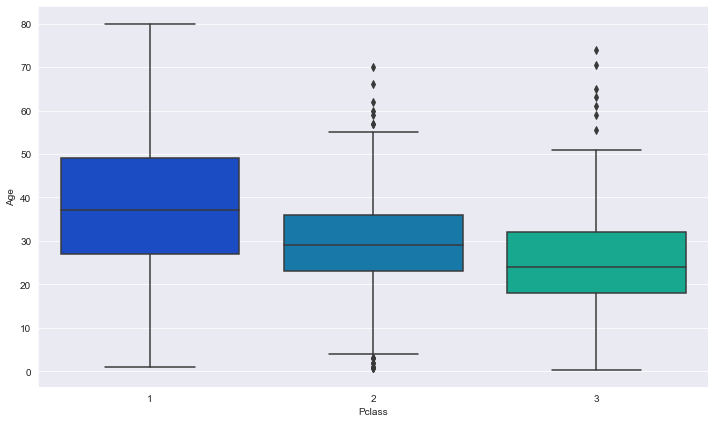

In [12]:
#Now in This Plot we See What Avg Age Of Passenger in 1st class, 2nd Class and Economy Class
plt.figure(figsize=(12,7))
sns.boxplot(x=pl["Pclass"],y=pl["Age"], data= pl, palette= 'winter')

In [13]:
#Now we see that 1st class avg age 36,2nd class somthing around 28 and economy age around 23 now we put the values 

In [14]:
def put_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 36
        elif Pclass == 2:
            return 28
        else:
            return 23
    else:
        return Age
    
#Now Apply the function

In [15]:
pl["Age"] = pl[["Age","Pclass"]].apply(put_age, axis= 1)

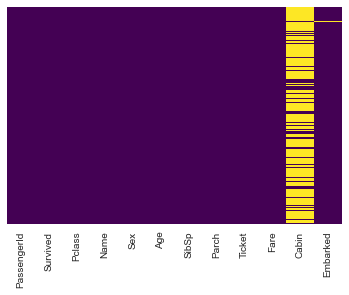

In [16]:
#Now Let Check the Heat Map Again
sns.heatmap(pl.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [17]:
#VOILA, we Fill the AGE values 

In [18]:
#Now there are so many Null Values in Cabin So we Drop the Cabin Column
pl.head()
pl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [19]:
#Drop Cabin Column Using Dropna
pl = pl.drop('Cabin', 1)

In [20]:
pl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [26]:
#Fill Embarked with using Mode 
pl["Embarked"].mode()
pl["Embarked"].fillna(value = "S", inplace = True)

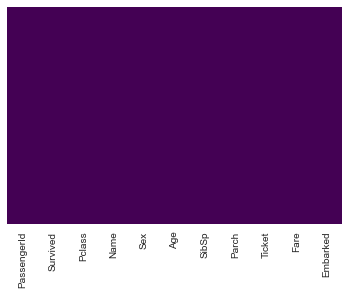

In [27]:
#Now Let Check the Heat Map Again
sns.heatmap(pl.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# Convert Categorical Features

In [28]:
pd.get_dummies(pl["Embarked"],drop_first=True).head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [32]:
sex = pd.get_dummies(pl["Sex"],drop_first=True)
embark = pd.get_dummies(pl["Embarked"],drop_first=True)

In [33]:
pl.drop(['Sex', 'Embarked', 'Name', 'Ticket'],axis= 1, inplace = True)

In [34]:
pl.head(3)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250


In [35]:
pl = pd.concat([pl,sex,embark],axis= 1)

In [36]:
pl.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1
